In [99]:
library(corrplot)
library(psych)
library(pastecs)
library(car)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:psych':

    logit



In [100]:
r <- read.csv("C:/Users/Michael/Desktop/bitcoin/Bitcoin.csv", header=T, dec=",")

In [101]:
r <- as.data.frame(r)
rr <- data.matrix(r[2:5])
head(rr)

mkt_Price,g_Trends,transactions,SP500
77,2,101390828,16
85,2,102612806,8
49,2,103904344,5
57,2,105350036,2
53,2,106880820,3
50,2,108353021,4


In [102]:
y <- as.numeric(as.character(r$mkt_Price), na.action(r$mkt_Price))
g_Trends <- as.numeric(as.character(r$g_Trends), na.action(r$g_Trends))
transactions <- as.numeric(as.character(r$transactions), na.action(r$transactions))
sp <- as.numeric(as.character(r$SP500), na.action(r$SP500))

In [103]:
sd_y <- sd(y)
mean_y <- mean(y)

In [104]:
z <- (1000 - mean_y) / sd_y
z
stat.desc(y)

[1] -0.8571482

nbr.val     nbr.null       nbr.na          min          max        range 
1.850000e+02 0.000000e+00 0.000000e+00 3.704000e+02 1.949868e+04 1.912828e+04 
         sum       median         mean      SE.mean CI.mean.0.95          var 
8.052459e+05 3.763626e+03 4.352681e+03 2.875745e+02 5.673674e+02 1.529933e+07 
     std.dev     coef.var 
3.911436e+03 8.986270e-01

In [105]:
p_right <- 1 - pnorm(z)
p_left <- pnorm(z)
p_right
p_left

[1] 0.8043185

[1] 0.1956815

In [106]:
ss <- ((z*sd_y)/287.574507342315)^2
ss

[1] 135.9201

In [107]:
breaks <- seq(from=min(y),
              to=max(y), length=10)
pop_freq <- cut(y, breaks=breaks,
                right=TRUE, include.lowest = TRUE)
table(pop_freq)

pop_freq
      [370,2.5e+03]  (2.5e+03,4.62e+03] (4.62e+03,6.75e+03] (6.75e+03,8.87e+03] 
                 75                  37                  28                  26 
 (8.87e+03,1.1e+04]  (1.1e+04,1.31e+04] (1.31e+04,1.52e+04] (1.52e+04,1.74e+04] 
                  6                   7                   3                   2 
(1.74e+04,1.95e+04] 
                  1 

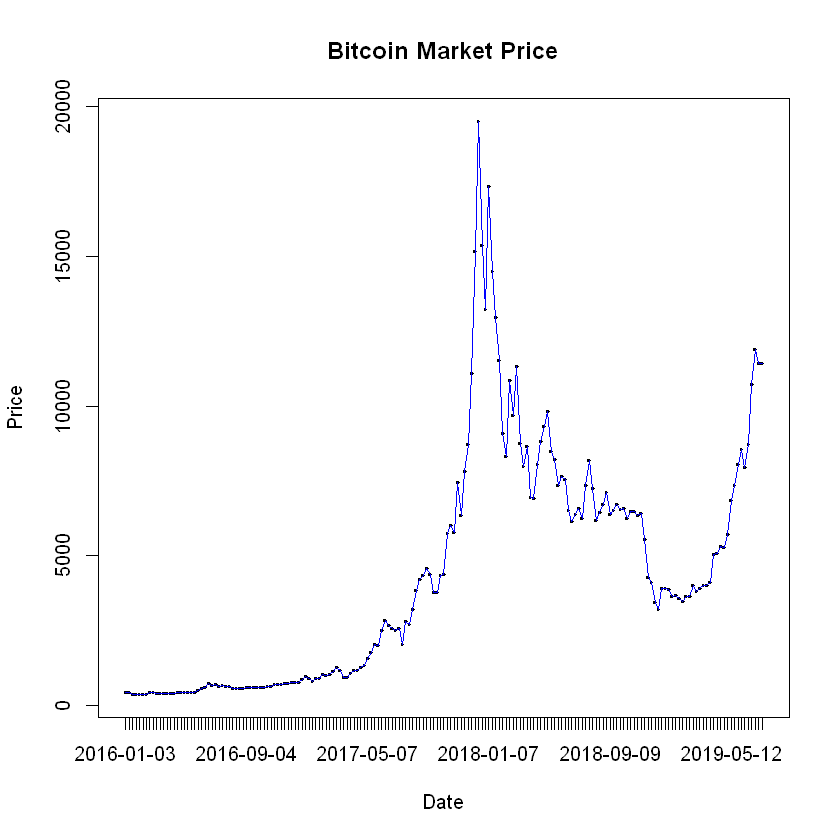

In [108]:
plot(r$Week, y,
     main = "Bitcoin Market Price",
     xlab = "Date",
     ylab = "Price")
lines(y, col = 'blue')

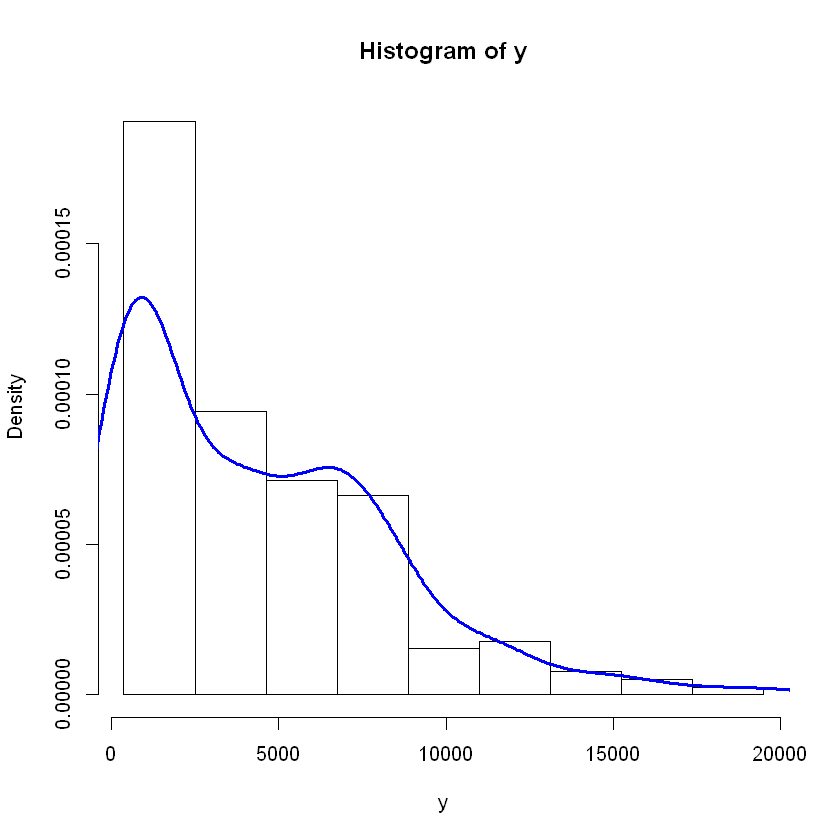

In [109]:
hist(y, breaks=breaks, freq=FALSE)
lines(density(y), lwd=3, col="blue")

[1] 103 106

5%         10%         15%         20%         25%         30% 
-1.00599433 -0.99698588 -0.95984607 -0.94526676 -0.92105571 -0.87586136 
        35%         40%         45%         50%         55%         60% 
-0.81114062 -0.58702718 -0.30912278 -0.15059803 -0.08697516  0.02689277 
        65%         70%         75%         80%         85%         90% 
 0.40144364  0.52226960  0.60249785  0.77128303  0.98326690  1.18018246 
        95% 
 1.80479541

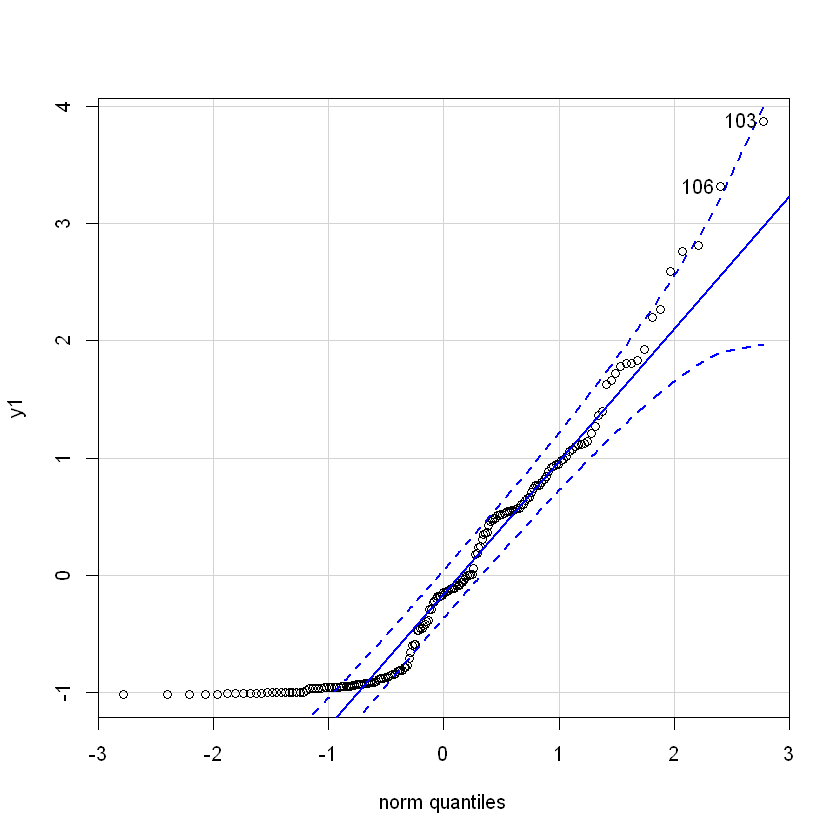

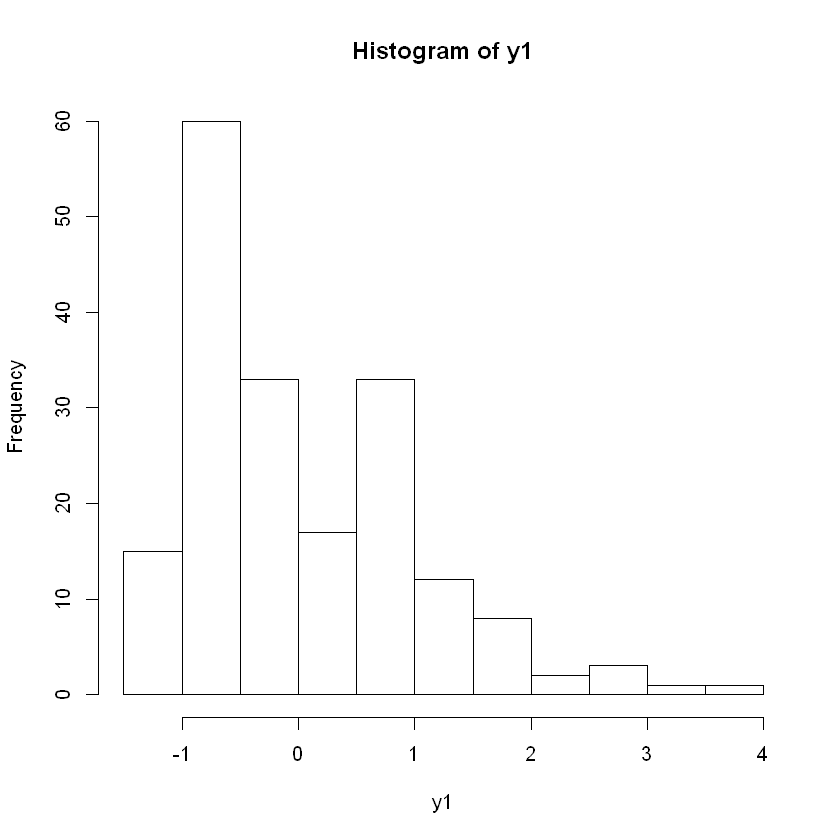

In [112]:
y1 <- (y-mean_y)/sd_y
qqPlot(y1)
quantile(y1,probs = seq(0.05,0.95,0.05))
hist(y1)

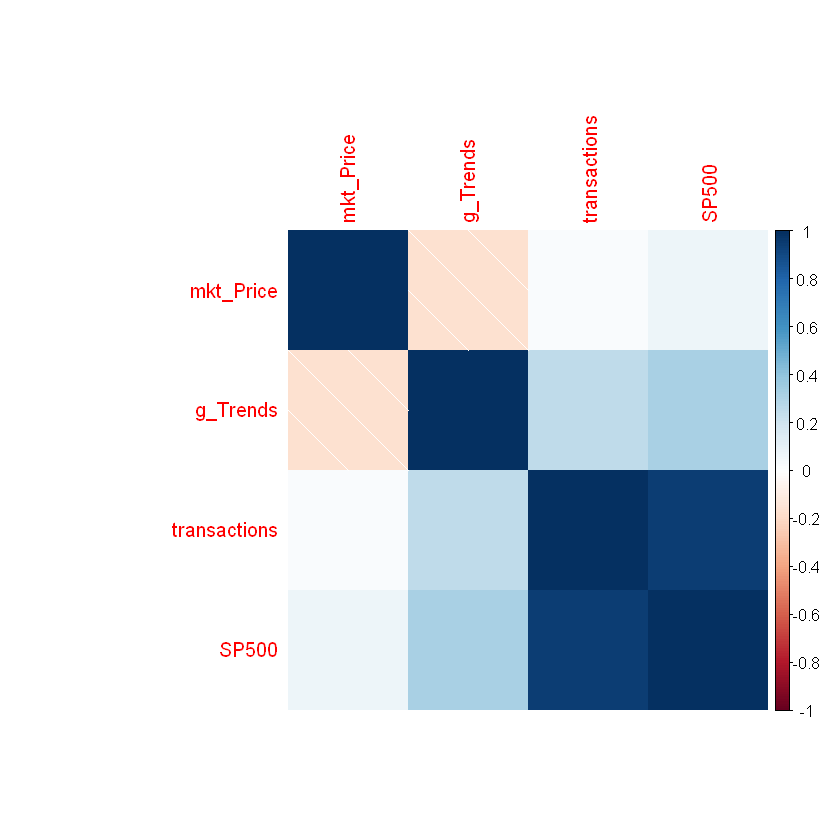

In [111]:
rr <- cor(rr)
corrplot(rr, method = "shade")